# Data project - antidepressants 

Imports and set magics:

In [453]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import pydst
import ipywidgets as widgets
dst = pydst.Dst(lang='da')

#%run dataproject.py

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\ladyk\AppData\Local\Temp\ipykernel_13816\833707093.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [381]:
#rt packeges 
#name data#columns_dict = {}
#columns_dict['AGEBYGROUP'] = 'agegroup'
#columns_dict['MEDICINTYPE'] = 'medicinetype'
#    columns_dict['INDHOLD'] = 'count'
#    columns_dict['Bnøgle'] = 'unit'
#    columns_dict['TID'] = 'year'
#    
#    var_dict = {} # var is for variable
#    var_dict['N05 Psycholeptica'] = '5'
#    var_dict['N06 Psychoanaleptica'] = '6'
#    
#    unit_dict = {}
#    unit_dict['Personer'] = 'person'
#    unit_dict['Indløste recepter'] = 'recepter'


#define dataframe #    
#    Medicin4_true = dst.get_data(table_id = 'MEDICIN4', variables={'TID':['*'], 'AGEBYGROUP':['*'], 
#    'MEDICINTYPE':['*']})
#    
#    Medicin4_true.rename(columns=columns_dict,inplace=True)
#print data
#Medicine_drop = Medicine.drop('BNØGLE',axis=1)
#Medicine_drop = Medicine_drop.drop('KØN',axis=1)
#Medicine_drop = Medicine_drop.drop('medicinetype',axis=1)


#removes all medicinetypes that isn't Psycholeptica (downer used for anxiety and OCD)
Medicin4_true.rename(columns=columns_dict,inplace=True)
I = (Medicin4_true['medicinetype'] == 'N05 Psycholeptica') & (Medicin4_true['agegroup'] != 'Alder i alt') & ( Medicin4_true['BNØGLE']=='Personer') & (Medicin4_true['KØN'] == 'Køn i alt')
Medicine=Medicin4_true[I]
Medicine['count'] = Medicine['count'].astype(int)


#drops unnecessary colums
#Medicine_drop = Medicine.drop('BNØGLE',axis=1)
Medicine_clean = Medicine.drop('KØN',axis=1)
Medicine_clean.head()


C:\Users\ladyk\AppData\Local\Temp\ipykernel_13816\659290362.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Medicine['count'] = Medicine['count'].astype(int)


,year,agegroup,medicinetype,BNØGLE,count
1970,2018,0-9 år,N05 Psycholeptica,Personer,738
1971,2018,10-19 år,N05 Psycholeptica,Personer,2170
1972,2018,20-29 år,N05 Psycholeptica,Personer,3726
1973,2018,30-39 år,N05 Psycholeptica,Personer,4606
1974,2018,40-49 år,N05 Psycholeptica,Personer,6303


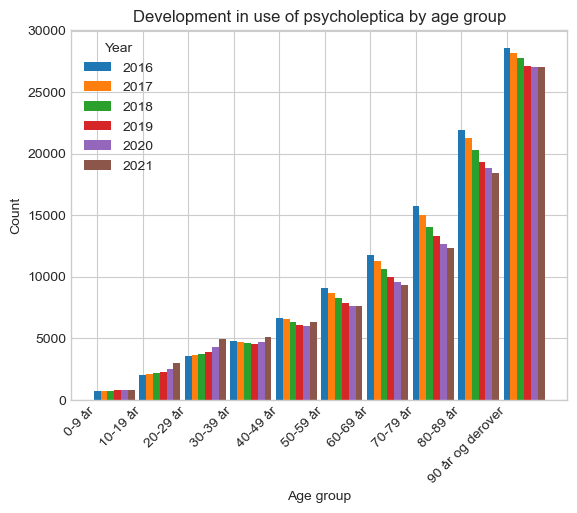

In [457]:
# Create pivot table with 'year' and 'agegroup' as indices and 'count' as values
med_pivot = pd.pivot_table(Medicine_clean, values='count', index=['agegroup'], columns=['year'])

# Create figure and axis objects
fig, ax = plt.subplots()

# Set width of each bar
bar_width = 0.15

# Create a bar for each year and age group
for i, year in enumerate(med_pivot.columns):
    x_pos = np.arange(len(med_pivot.index)) + (i * bar_width)
    ax.bar(x_pos, med_pivot[year], width=bar_width, label=str(year))

# Set x-axis and y-axis labels and ticks
ax.set_xticks(np.arange(len(med_pivot.index)))
ax.set_xticklabels(med_pivot.index, rotation=45, ha='right')
ax.set_xlabel('Age group')
ax.set_ylabel('Count')

# Set legend
ax.legend(title='Year')

# Set title
ax.set_title('Development in use of psycholeptica by age group')


# Show the plot
plt.show()



As shown in the above figure the use of psycholeptica is higher, the older you are. People that are 90 and older has the highest use psycholeptica per 100.000 people in all years. The use has mainly been decreasing for people above the age of 40, while it is increasing for people between 0-29. 

In [287]:
J = (Medicine_clean['agegroup'] != '0-9 år') | (Medicine_clean['agegroup'] != '10-19 år') | (Medicine_clean['agegroup'] != '70-79 år') | (Medicine_clean['agegroup'] != '80-89 år') | (Medicine_clean['agegroup'] != '90 og derover')
Medicine_help=Medicine_clean[J]


Medicine_congregate = Medicine_help.groupby(['year']).sum()
Medicine_congregate.head()

C:\Users\ladyk\AppData\Local\Temp\ipykernel_13816\4278527602.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Medicine_congregate = Medicine_help.groupby(['year']).sum()


,count
year,
2016,104734
2017,102138
2018,98513
2019,95224
2020,93983


In [421]:
#pct-change




# Group the data by agegroup
Medicine_clean = Medicine_clean.sort_values(['year', 'agegroup'])
Medicin_pct = Medicine_clean.groupby('agegroup')

# Calculate the percentage change in count for each year
growth_rates = Medicin_pct['count'].pct_change()

# Print the result
Medicin_pct.head()

# Group the data by year and agegroup
Medicin_pct = Medicine_clean.groupby(['agegroup'])

# Calculate the percentage change in count for each group
growth_rates = Medicin_pct['count'].pct_change()

# Add the growth_rate series as a new column to the original dataframe
Medicine_clean['growth_rate'] = growth_rates*100

# Print the results without "not a number"

Medicine_clean_growth = Medicine_clean.dropna()

print(Medicine_clean_growth)

      year          agegroup       medicinetype    BNØGLE  count  growth_rate
2545  2017            0-9 år  N05 Psycholeptica  Personer    754     1.891892
2546  2017          10-19 år  N05 Psycholeptica  Personer   2076     4.374057
2547  2017          20-29 år  N05 Psycholeptica  Personer   3646     2.762120
2548  2017          30-39 år  N05 Psycholeptica  Personer   4708    -1.113212
2549  2017          40-49 år  N05 Psycholeptica  Personer   6542    -1.742265
2550  2017          50-59 år  N05 Psycholeptica  Personer   8708    -3.768372
2551  2017          60-69 år  N05 Psycholeptica  Personer  11253    -4.172699
2552  2017          70-79 år  N05 Psycholeptica  Personer  14999    -4.719858
2553  2017          80-89 år  N05 Psycholeptica  Personer  21273    -2.902917
2554  2017  90 år og derover  N05 Psycholeptica  Personer  28179    -1.454800
1970  2018            0-9 år  N05 Psycholeptica  Personer    738    -2.122016
1971  2018          10-19 år  N05 Psycholeptica  Personer   2170

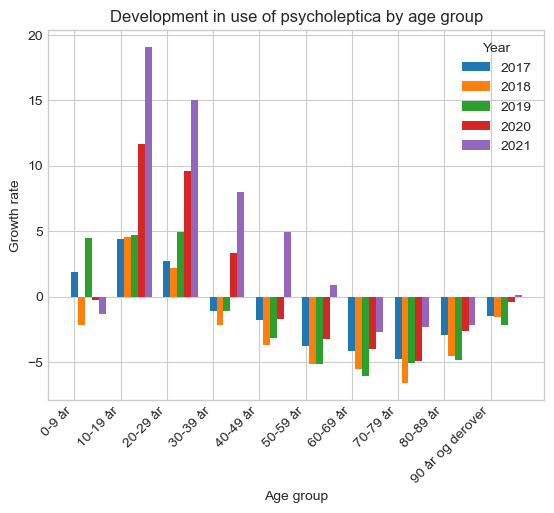

In [426]:
med_pivot = pd.pivot_table(Medicine_clean, values='growth_rate', index=['agegroup'], columns=['year'])

# Create figure and axis objects
fig, ax = plt.subplots()

# Set width of each bar
bar_width = 0.15

# Create a bar for each year and age group
for i, year in enumerate(med_pivot.columns):
    x_pos = np.arange(len(med_pivot.index)) + (i * bar_width)
    ax.bar(x_pos, med_pivot[year], width=bar_width, label=str(year))

# Set x-axis and y-axis labels and ticks
ax.set_xticks(np.arange(len(med_pivot.index)))
ax.set_xticklabels(med_pivot.index, rotation=45, ha='right')
ax.set_xlabel('Age group')
ax.set_ylabel('Growth rate')

# Set legend
ax.legend(title='Year')

# Set title
ax.set_title('Development in use of psycholeptica by age group')

# Show the plot
plt.show()

# Read and clean data

In [461]:
HFUDD11_true = dst.get_data(table_id = 'HFUDD11', variables={'TID':['*'],'ALDER':['*'], 'HFUDD':['*']})
#HFUDD11_true = HFUDD11_true.drop() #Drop alle med 2008-2015
HFdropped = HFUDD11_true.drop('BOPOMR',axis=1)
HFdropped = HFdropped.drop('HERKOMST',axis=1)
HFdropped = HFdropped.drop('KØN',axis=1)
I = (HFdropped['ALDER'] == 'Alder i alt')
HFdropped.drop(HFdropped[I].index,inplace=True)
I = (HFdropped['HFUDD'].str[3] != ' ')
HFdropped.drop(HFdropped[I].index,inplace=True)
I = (HFdropped['TID'].astype(int) < 2016)
HFdropped.drop(HFdropped[I].index,inplace=True)
I = (HFdropped['TID'].astype(int) > 2021)
HFdropped.drop(HFdropped[I].index,inplace=True)
I = (HFdropped['ALDER'].str[0] == '1')
HFdropped.drop(HFdropped[I].index,inplace=True)
I = (HFdropped['HFUDD'] == 'H35 Adgangsgivende uddannelsesforløb')
HFdropped.drop(HFdropped[I].index,inplace=True)
I = (HFdropped['HFUDD'] == 'H80 Ph.d. og forskeruddannelser')
HFdropped.drop(HFdropped[I].index,inplace=True)

HFdropped['NEWALDER'] = HFdropped['ALDER'].str[0] + "0-" + HFdropped['ALDER'].str[0] + "9 år"
print(HFdropped.head(10))
HFcongregate = HFdropped.groupby(['TID', 'HFUDD']).sum()
Agecongregate = HFdropped.groupby(['TID', 'NEWALDER']).sum()



uddannelser = HFdropped['HFUDD'].unique().tolist()
udannelseslist = ['Grundskole', 'Gymnasiale uddannelser','Erhvervsfaglige uddannelser','Korte videregående uddannelser','Mellemlange videregående uddannelser', 'Bacheloruddannelser', 'Lange videregående uddannelser', 'Uoplyst mv.']
print(Agecongregate)
Uddannelsesdict = dict(zip(udannelseslist,uddannelser))
#print(Uddannelsesdict)
#congregate udgøres af 20-69 årige med forskellige uddannelser. Summer ikke til "Alder i alt", da der er nogen uddannelser der er fjernet (H35, H80, og øvrige)
#print(HFdropped.head(10))
#print(HFcongregate.head(10))

#to show that there is no missing
#print("Missing values distribution: ")
#print(HFUDD11_true.isnull().mean())
#print("")


       TID     ALDER           HFUDD  INDHOLD  NEWALDER
8182  2016  20-24 år  H10 Grundskole    98256  20-29 år
8183  2016  25-29 år  H10 Grundskole    64768  20-29 år
8184  2016  30-34 år  H10 Grundskole    54424  30-39 år
8185  2016  35-39 år  H10 Grundskole    52556  30-39 år
8186  2016  40-44 år  H10 Grundskole    61922  40-49 år
8187  2016  45-49 år  H10 Grundskole    71064  40-49 år
8188  2016  50-54 år  H10 Grundskole    81461  50-59 år
8189  2016  55-59 år  H10 Grundskole    83440  50-59 år
8190  2016  60-64 år  H10 Grundskole    92212  60-69 år
8191  2016  65-69 år  H10 Grundskole    90335  60-69 år
               INDHOLD
TID  NEWALDER         
2016 20-29 år   761756
     30-39 år   660739
     40-49 år   775672
     50-59 år   770664
     60-69 år   670651
2017 20-29 år   775976
     30-39 år   663260
     40-49 år   760210
     50-59 år   783369
     60-69 år   662445
2018 20-29 år   783709
     30-39 år   666030
     40-49 år   752273
     50-59 år   789548
     60-69 år   

C:\Users\ladyk\AppData\Local\Temp\ipykernel_13816\3668440376.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  HFcongregate = HFdropped.groupby(['TID', 'HFUDD']).sum()
C:\Users\ladyk\AppData\Local\Temp\ipykernel_13816\3668440376.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Agecongregate = HFdropped.groupby(['TID', 'NEWALDER']).sum()


In [462]:
#imports MEDICIN3
Medicin3_true = dst.get_data(table_id = 'MEDICIN3', variables={'TID':['*'], 'MEDICINTYPE':['*'], 'AGEBYGROUP':['*'], 'UDDANNELSE':['*']})
#removes unnecessary columns
Medicin3_dropped = Medicin3_true.drop('BNØGLE',axis=1)
Medicin3_dropped = Medicin3_dropped.drop('KØN',axis=1)

#cleans data so only the necessary variables are left
#I = (Medicin3_dropped['KØN'] != "Køn i alt")
#Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
#I = (Medicin3_dropped['BNØGLE'] != "Personer")
#Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['MEDICINTYPE'] != "N05 Psycholeptica")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['UDDANNELSE'] == "Uddannelser i alt")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['AGEBYGROUP'] == "Alder i alt")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['AGEBYGROUP'].str[0] == "0")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['AGEBYGROUP'].str[0] == "1")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['AGEBYGROUP'].str[0] == "7")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['AGEBYGROUP'].str[0] == "8")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['AGEBYGROUP'].str[0] == "9")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
I = (Medicin3_dropped['INDHOLD'].str[0] == ".")
Medicin3_dropped.drop(Medicin3_dropped[I].index,inplace=True)
Medicin3_dropped["INDHOLD"] = Medicin3_dropped["INDHOLD"].astype(int)

Medicin3_dropped.rename(columns={'UDDANNELSE':'HFUDD'}, inplace=True)
Medicin3_dropped.rename(columns={'INDHOLD':'Count'}, inplace=True)
Medicin3_dropped.rename(columns={'AGEBYGROUP':'NEWALDER'}, inplace=True)

for key,value in Uddannelsesdict.items():
   Medicin3_dropped.HFUDD.replace(key,value,inplace=True)
Medicin3_dropped.to_excel("output.xlsx") 
Medicin3congregate = Medicin3_dropped.groupby(['TID', 'HFUDD']).sum()
Medicin3Agecongregate = Medicin3_dropped.groupby(['TID', 'NEWALDER']).sum()
print(Medicin3Agecongregate.head(8))


               Count
TID  NEWALDER       
2016 20-29 år  26708
     30-39 år  31862
     40-49 år  51968
     50-59 år  70948
     60-69 år  79762
2017 20-29 år  27994
     30-39 år  31724
     40-49 år  50286


C:\Users\ladyk\AppData\Local\Temp\ipykernel_13816\3852084849.py:39: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Medicin3congregate = Medicin3_dropped.groupby(['TID', 'HFUDD']).sum()
C:\Users\ladyk\AppData\Local\Temp\ipykernel_13816\3852084849.py:40: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Medicin3Agecongregate = Medicin3_dropped.groupby(['TID', 'NEWALDER']).sum()


In [474]:
samlet = Medicin3congregate.join(HFcongregate,how='left',on=['TID','HFUDD'])
samletAge = Medicin3Agecongregate.join(Agecongregate,how='left',on=['TID','NEWALDER'])


andel=samlet['Count']/samlet['INDHOLD']
samlet['andel']=andel*100
print(samlet.head(8))
andelAge=samletAge['Count'].astype(int)/samletAge['INDHOLD'].astype(int)
samletAge['andel']=andelAge*100
print(samletAge.head(8))

                                                    Count  INDHOLD      andel
TID  HFUDD                                                                   
2016 H10 Grundskole                                 89878   750438  11.976739
     H20 Gymnasiale uddannelser                     17647   378147   4.666704
     H30 Erhvervsfaglige uddannelser                80219  1221258   6.568555
     H40 Korte videregående uddannelser, KVU         9257   193610   4.781261
     H50 Mellemlange videregående uddannelser, MVU  35772   584961   6.115279
     H60 Bacheloruddannelser, BACH                   3400    95754   3.550766
     H70 Lange videregående uddannelser, LVU        17782   366258   4.855048
     H90 Uoplyst mv.                                 7293    49056  14.866683
               Count  INDHOLD      andel
TID  NEWALDER                           
2016 20-29 år  26708   761756   3.506110
     30-39 år  31862   660739   4.822176
     40-49 år  51968   775672   6.699739
     50-59 år  

It should be noted that the data could be affected by the age groups, as people tend to educate themselvs more now than a century ago 

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

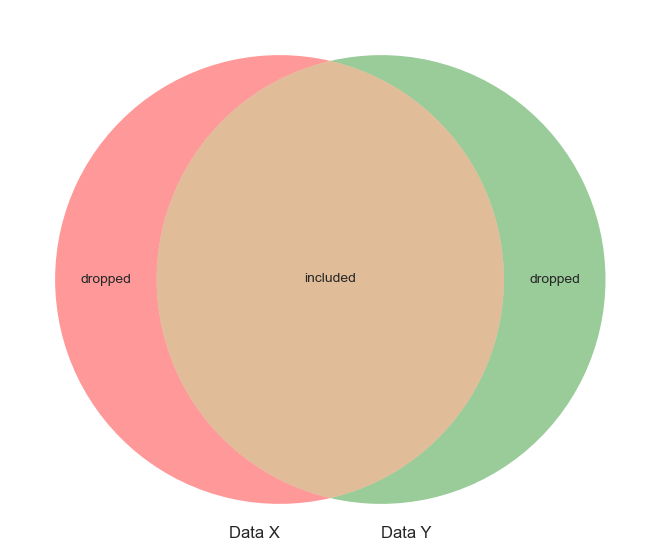

In [103]:
plt.figure(figsize=(15,7))
v = venn2(subsets = (4, 4, 10), set_labels = ('Data X', 'Data Y'))
v.get_label_by_id('100').set_text('dropped')
v.get_label_by_id('010').set_text('dropped' )
v.get_label_by_id('110').set_text('included')
plt.show()

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

In [372]:
Medicine_clean["count"].describe()

count       60.000000
mean      9825.216667
std       8162.790382
min        738.000000
25%       3864.000000
50%       7122.500000
75%      13483.000000
max      28595.000000
Name: count, dtype: float64

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

From the analysis of data over antidepresant use, we can conclude that in genereal antidepressants are more commonly used the older people get, but development over the analysed time period shows that young people (here age 0-30) is increasing the useage over time, while the elder generations is decreasing its use.

Other than that we have looked at data divided by education level, and from this we can conclude that idividuals that have only compleated their primary school is way more likely to use antidepressants than people with higher educations  